In [29]:
## Part 1 Step 1: Scrape competitor's data 

import requests
from bs4 import BeautifulSoup
import pandas as pd

from collections import OrderedDict

space_weather_url = 'https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares'
space_weather_response_file = 'spaceweather.html'

# if data has already been scraped, load file into bs
if os.path.isfile(space_weather_response_file):
    with open(space_weather_response_file,'r') as spaceweather_out:
        soup = BeautifulSoup(spaceweather_out, 'html')
# otherwise, request data from spaceweather.com
else:
    # prepare header (site has antiscraping tools in use)
    browser_headers = {
            "Connection": "keep-alive",
            "Upgrade-Insecure-Requests": "1",
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36",
            "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
            "Sec-Fetch-Site": "same-origin",
            "Sec-Fetch-Mode": "navigate",
            "Sec-Fetch-User": "?1",
            "Sec-Fetch-Dest": "document",
            "Referer": "https://www.google.com/",
            "Accept-Encoding": "gzip, deflate, br",
            "Accept-Language": "en-US,en;q=0.9"
        }
    prepped_header = OrderedDict()

    for header,value in browser_headers.items():
        prepped_header[header]=value

    # prepare and send request
    r = requests.Session()
    r.headers = prepped_header
    response = r.get(space_weather_url)

    # get request text and save as file
    space_weather_html_doc = response.text
    with open('spaceweather.html','w+') as spaceweather_out:
        spaceweather_out.writelines(html)

    print(response.status_code)

    # parse file using bs
    soup = BeautifulSoup(space_weather_html_doc, 'html.parser')

# Use beautiful soup to print formatted html document
# soup.prettify()

# find table containing data in webpage, and read it into pandas
x = soup.find('table', {'class':'table table-striped table-responsive-md'})
solar_flare_df = pd.read_html(x.prettify())[0]

# rename columns, display
solar_flare_df = solar_flare_df.rename(columns = {'Unnamed: 0':'rank', 'Unnamed: 1':'x_class', 'Unnamed: 2':'date', 'Unnamed: 7':'movie'})
solar_flare_df.head(5)


,rank,x_class,date,Region,Start,Maximum,End,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,Movie View archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,Movie View archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,Movie View archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,Movie View archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,Movie View archive


In [30]:
## Part 1 Step 2 Tidy the top 50 solar flare data
from datetime import datetime
from datetime import timedelta
import numpy as np
import re

# 1. Drop the last column of the table, since we are not going to use it moving forward.
solar_flare_df = solar_flare_df.drop(columns=['movie'], axis=1)

# 2. Use datetime import to combine the date and each of the three time columns into three datetime columns. You will see why this is useful later on. iterrows() should prove useful here.

for index, row in solar_flare_df.iterrows():
    date = datetime.strptime(row['date'], '%Y/%m/%d')
    
    # Replace time_date with datetime
    try:
        start_time_match = re.search('([\d]{2}):([\d]{2})', row['Start'])
        start_hour = int(start_time_match.group(1))
        start_min = int(start_time_match.group(2))
        solar_flare_df.at[index, 'Start'] = date + timedelta(hours=start_hour, minutes=start_min)
    except TypeError:
        solar_flare_df.at[index, 'Start'] = np.nan

    # Replace end_date with datetime
    try:
        max_time_match = re.search('([\d]{2}):([\d]{2})', row['Maximum'])
        max_hour = int(max_time_match.group(1))
        max_min = int(max_time_match.group(2))
        solar_flare_df.at[index, 'Maximum'] = date + timedelta(hours=max_hour, minutes=max_min)
    except TypeError:
        solar_flare_df.at[index, 'Maximum'] = np.nan
    
    # Replace cme_date with datetime
    try:
        end_time_match = re.search('([\d]{2}):([\d]{2})', row['End'])
        end_hour = int(end_time_match.group(1))
        end_min = int(end_time_match.group(2))
        solar_flare_df.at[index, 'End'] = date + timedelta(hours=end_hour, minutes=end_min)
    except TypeError:
        solar_flare_df.at[index, 'End'] = np.nan

    if(row['Start'] > row['End']):
        solar_flare_df.at[index, date_time] = row['End'] + timedelta(days=1)
        if(row['Start'] > row['Maximum']):
            solar_flare_df.at[index, date_time] = row['Maximum'] + timedelta(days=1)

solar_flare_df = solar_flare_df.rename(columns={"Start": "start_datetime", "Maximum": "max_datetime", "End": "end_datetime", "Region": "region"})

solar_flare_df = solar_flare_df[['rank', 'x_class', 'start_datetime', 'max_datetime', 'end_datetime', 'region']]

solar_flare_df.head(5)
        

        
        
        #print(col.)
# 3. Update the values in the dataframe as you do this. Set_value should prove useful.

# 4. Set regions coded as - as missing (NaN). You can use dataframe.replace() here.




,rank,x_class,start_datetime,max_datetime,end_datetime,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415


In [31]:
import re
import numpy as np
# Part 1 Step 3: Scrape the NASA data
nasa_url = 'https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html'

 # prepare header (site has antiscraping tools in use)
browser_headers = {
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
        "Sec-Fetch-Site": "same-origin",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-User": "?1",
        "Sec-Fetch-Dest": "document",
        "Referer": "https://www.google.com/",
        "Accept-Encoding": "gzip, deflate, br",
        "Accept-Language": "en-US,en;q=0.9"
    }
prepped_header = OrderedDict()

for header,value in browser_headers.items():
    prepped_header[header]=value

# prepare and send request
r = requests.Session()
r.headers = prepped_header
response = r.get(nasa_url)

soup = BeautifulSoup(response.text, 'html.parser')
data_line = re.compile('[\d]{4}/[\d]{2}/[\d]{2}')

pre_lines = str(soup.find('pre')).splitlines()


lines_wo_href = []
for line in pre_lines:
    if re.match(data_line, line):
        lines_wo_href.append(re.sub('([<][^>]*[>])', '', line))

regex_grouped_lines = []
r = re.compile('([\d]{4}/[\d]{2}/[\d]{2})[\s]+([\d]{2}\:[\d]{2})[\s]+(\d{2}/\d{2})[\s]+([\d]{2}\:[\d]{2})[\s]+([\d\?]+)[\s]+([\d\?]+)[\s]+([\w\-\?]+)[\s]+([\w\-\?]+)[\s]+([\w\-\.]+)[\s]+([\d\-]{2}/[\d\-]{2})[\s]+([\d\-]{2}\:[\d\-]{2})[\s]+([\w\-]+)[\s]+([\w\-\&\;\>]+)[\s]+([\w\-]+)[\s]+([\w]+)')

arr = []
for line in lines_wo_href:
    match = re.match(r, line)
    line_data = []
    for x in range(1,16):
        line_data.append(match.group(x))
    arr.append(line_data)

column_names = ['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region', 'importance', 'cme_date', 'cme_time', 'cpa', 'width', 'speed', 'plot']
df = pd.DataFrame(data=np.array(arr), columns=column_names)

# Replace missing values with NaN
missing_vals = '(--/--|[\?\-]+|--\:--|FILA|DSF|BACK|Back|DIM|EP)'
df.replace(regex=True, to_replace=missing_vals, value=np.nan, inplace=True)

# Tidy Table, change dates and times
for index, row in df.iterrows():
    # Replace time_date with datetime
    try:
        start_date = datetime.strptime(row['start_date'], '%Y/%m/%d')
        start_time_match = re.search('([\d]{2}):([\d]{2})', row['start_time'])
        start_hour = int(start_time_match.group(1))
        start_min = int(start_time_match.group(2))
        row['start_date'] = start_date + timedelta(hours=start_hour, minutes=start_min)
    except TypeError:
        row['start_date'] = np.nan

    # Replace end_date with datetime
    try:
        end_date = datetime.strptime(row['end_date'], '%m/%d').replace(year=start_date.year)
        end_time_match = re.search('([\d]{2}):([\d]{2})', row['end_time'])
        end_hour = int(end_time_match.group(1))
        end_min = int(end_time_match.group(2))
        row['end_date'] = end_date + timedelta(hours=end_hour, minutes=end_min)
    except TypeError:
        row['end_date'] = np.nan
    

    # Replace cme_date with datetime
    try:
        cme_date = datetime.strptime(row['cme_date'], '%m/%d').replace(year=start_date.year)
        cme_time_match = re.search('([\d]{2}):([\d]{2})', row['cme_time'])
        cme_hour = int(cme_time_match.group(1))
        cme_min = int(cme_time_match.group(2))
        row['cme_date'] = cme_date + timedelta(hours=cme_hour, minutes=cme_min)
    except TypeError:
        row['cme_date'] = np.nan


is_halo = np.full(len(df.index), dtype=bool, fill_value=True)
width_lower_bound = np.full(len(df.index), dtype=bool, fill_value=False)
for index, row in df.iterrows():
    if str(row['cpa']).lower() != 'halo':
        np.put(is_halo,[index],[False])
    else:
        row['cpa'] = np.nan
    
    width = str(row['width'])
    if '>' in width:
        np.put(width_lower_bound,[index],[True])
        row['width'] = width.replace('>', '')

df.drop(columns=['start_time', 'end_time', 'cme_time'], axis=1, inplace=True)
df.rename(columns={"start_date": "start_datetime", "end_date": "end_datetime", "cme_date": "cme_datetime"}, inplace=True)
df.insert(column='is_halo', value=is_halo, loc=12)
df.insert(column='width_lower_bound', value=width_lower_bound, loc=13)

df
#, 'is_halo', 'width_lower_bound'


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017-09-04 20:12:00,NaN,360,1418,PHTX,True,False
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,True,False
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,PHTX,True,False
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252,PHTX,False,False


In [32]:
## Step 2, Question 1

magnitudes = np.full(len(df.index), dtype=float, fill_value=0)

extractor = re.compile('([BCMX])([\d\.]+)', re.IGNORECASE)
class_to_mag = {'A':1, 'B':10, 'C':100, 'M':1000, 'X':10000}
for index, row in df.iterrows():
    try:
        importance = row['importance']
        importance_g = extractor.match(importance)
        cl = class_to_mag[importance_g.group(1)]
        magnitude = float(importance_g.group(2))

        abs_mag = cl * magnitude
        np.put(magnitudes, [index], [abs_mag])

    except TypeError:
        np.put(magnitudes, [index], [np.nan])

ranking = pd.DataFrame({'magnitude':magnitudes})
ranking.sort_values(by='magnitude', axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last', ignore_index=False)

ranking.head(50)

# Through visual inspection, it seems that my rankings of the top solarflares from the NASA data are similar to those posted by SpaceWeatherLive; although, they are not the exact same.  It seems that SpaceWeatherLive takes more into account than the Soft X-ray flare importance.

,magnitude
240,280000.0
117,200000.0
233,170000.0
126,140000.0
234,100000.0
8,94000.0
514,93000.0
328,90000.0
515,83000.0
237,83000.0


In [33]:
# Step 2, Question 2
spaceweather_cor_index = np.full(len(df.index), dtype=np.uint8, fill_value=np.nan)
for i in ranking.head(50).index:
    nasa_datetime = df.loc[i]['start_datetime']
    
    dt = solar_flare_df.loc[0]['start_datetime'] - nasa_datetime
    closest = abs(dt.total_seconds())
    closest_i = 0
    for index, row in solar_flare_df.iterrows():
        dt = row['start_datetime'] - nasa_datetime
        if abs(dt.total_seconds()) < closest:
            closest = abs(dt.total_seconds())
            closest_i = index
        np.put(spaceweather_cor_index,[index],[closest_i])

df.insert(column='space_weather_ranking', value=spaceweather_cor_index, loc=14)
df

# To find the best matching solar flare between the NASA and SpaceWeather data, I am iterating over the top-ranking flares from the NASA dataset and finding the closest match in the SpaceWeather by comparing start times.  This does not appear to be the best method of correlation.




,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,plot,is_halo,width_lower_bound,space_weather_ranking
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False,0
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False,1
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False,1
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False,1
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017-09-04 20:12:00,NaN,360,1418,PHTX,True,False,0
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,PHTX,True,False,0
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,PHTX,True,False,0
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252,PHTX,False,False,0


&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f4605b23d00&gt;

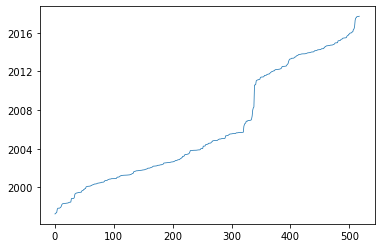

In [35]:
# Part 2, Question 3

df['start_datetime'].plot(linewidth=0.75)

# It appears they solar flares do cluster over time.  The axes are wrong, but if you draw a diagonal line from 0,0 to 1,1, and notice the hills, you can identify clusters of activity.